# Sleep Health and Lifestyle Data Mining Project Report

# Table of Contents
1. [Overview](#Overview)  


2. [Data-Description](#Data-Description)  

    2.1 [Data-Outline](#Data-Outline)  
    
    2.2 [Data Sufficiency](#Data-Sufficiency)  
    
    
3. [Data Exploration](#Data-Exploration)  

    3.1 [Gender](#Gender)  
    
    3.2 [Age](#Age)  
    
    3.3 [Occupation](#Occupation)    
    
    3.4 [Sleep Quality](#Sleep-Quality)
    
    
4. [Model Experiment](#Model-Experiment) 


5. [Standardization](#Standardization)  

    
6. [K-Means Clustering](#K-Means-Clustering)
    
    6.1 [K-Means Kustering Processing](#K-Means-Kustering-Processing)
    
    6.2 [PCA & t-SNE Visualization](#PCA-and-t-SNE-Visualization)
    
    
7. [Hierarchical Clustering](#Hierarchical-Clustering)
    
    7.1 [Hierarchical Clustering Processing](#Hierarchical-Clustering-Processing)
    
    7.2 [UMAP](#UMAP)
    
    7.3 [Violin Plot](#Violin-Plot)


8. [Mini-Batc K-Means Clustering](#Mini-Batc-K-Means-Clustering)
    
    8.1 [Mini-Batch K-Means Clustering Processing](#Mini-Batc-K-Means-Clustering)
    
    8.2 [Radar Profile Plot](#Radar-Profile-Plot)
    
    8.3 [Occupation Analysis](#Occupation-Analysis)
    
    8.4 [Sleep Disorder Analysis](#Sleep-Disorder-Analysis)
  
  
9. [K-NN After Mini-Batch K-Means Clustering](#K-NN-After-Mini-Batch-K-Means-Clustering)
    
    9.1 [Confusion Matrix](#Confusion-Matrix)
    
    9.2 [Mini-Batch K-Means t-SNE](#Mini-Batch-K-Means-t-SNE)
    

10. [Conclusion](#Conclusion) 
    
  

# 1. Overview <a id="Overview"></a>

Sleep health and lifestyle really matters to everyone’s life currently. This project is focusing on data mining learnt from this course, to analyze the residents’ sleep quality and lifestyle. From this project, we also want to drive some insights about current people's sleep quality, as well as some suggestions and recommendations for current generation sleeping style. This project can be a good reference for the researchers, health related professions and the public caring about public health and sleep quality.

# 2. Data Description <a id="Data-Description"></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 2.1 Data Outline <a id="Data-Outline"></a>

The dataset includes various health and lifestyle factors for 37,400 individuals, including the following variables:

 Person ID: A unique identifier for each individual.
 
 Age: The age of the person in years.
 
 Gender: Information on the gender of the individual.
 
 Occupation: The individual’s occupation.
 
 Sleep Duration: Hours of sleep per night.
 
 Quality of Sleep: A subjective rating of sleep quality on a scale of 1 to 10.
 
 Physical Activity Level: The number of minutes of physical activity per day.
 
 Stress Level: A stress rating on a scale of 1 to 10.
 
 BMI Category: A classification of body mass index (BMI) into underweight, normal, or overweight.
 
 Blood Pressure: Measured in systolic/diastolic units.
 
 Heart Rate: The individual’s resting heart rate in beats per minute (bpm).
 
 Daily Steps: The number of steps taken per day.
 
 Sleep Disorder: Categorized as none, insomnia, or sleep apnea.

## 2.2 Data Sufficiency <a id="Data-Sufficiency"></a>

The data contains 37,400 datasets and is appropriate for this problem being addressed. 

This is a good size and manageable per this project.

# 3. Data Exploration <a id="Data-Exploration"></a>


And following we can see the print of tail of datasets:

In [92]:
# csv to dataframe
df = pd.read_csv("37400_enriched_large_sleep_health_dataset.csv")
df2 = df
# tail of dataframe
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
37395,37396,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
37396,37397,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
37397,37398,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
37398,37399,Male,43,Engineer,6.9,6,47,7,Normal Weight,117/76,69,6800,None
37399,37400,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia


From the above printed dataset tail, we can see that particularly in the last column ‘Sleep Disorder’, it has many empty NaN contents there, this means the person does not have either insomnia or sleep apnea.

And following is for the attributes of all categories’ information:

In [5]:
unique_occupations = df['Occupation'].unique()
print(f"Unique occupations: {unique_occupations}" )

unique_BMI = df['BMI Category'].unique()
print(f"Unique BMI: {unique_BMI}" )

unique_SleepDisorder = df['Sleep Disorder'].unique()
print(f"Unique Sleep Disorder: {unique_SleepDisorder}" )

Unique occupations: ['Teacher' 'Nurse' 'Doctor' 'Accountant' 'Engineer' 'Lawyer' 'Salesperson'
 'Manager' 'Scientist' 'Sales Representative' 'Software Engineer']
Unique BMI: ['Normal' 'Overweight' 'Normal Weight' 'Obese']
Unique Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']


Per the occupations, there are a total eleven types ranging from teacher to software engineer. This kind of covers most of the common occupations in society. And the original datasets already provided the BMI with normal, overweight, normal weight and obese. And the sleep disorder types have the nan which stands for None, besides the sleep apnea and insomnia.

## 3.1 Gender <a id="Gender"></a>

Per the gender, male and female are having a similar ratio in the datasets with 18786 males and 18614 females, that is saying the ratio per gender is balanced in the collected survey data. This shows there will not be a biased analysis per the gender side.


Value counts:
Male      18786
Female    18614
Name: Gender, dtype: int64


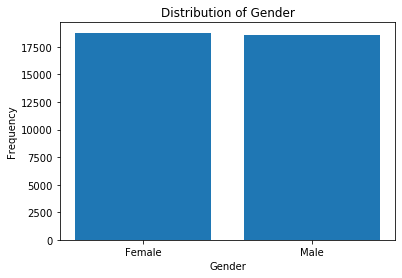

In [6]:
column = 'Gender'
unique_values = df[column].unique()
unique_counts = df[column].value_counts()

print("Value counts:")
print(unique_counts)

plt.figure()
plt.bar(unique_values, df[column].value_counts())
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

## 3.2 Age <a id="Age"></a>


And for the age ranges, we can see more people between the age 30-45 are surveyed in this dataset. The age is ranging from 25 to 55 in this collected survey data. The main surveyed groups fall in age range: 30-35, 35-40 and 40-45.

The range of age values is: 27-59
The mean of age values is: 42.14267379679144


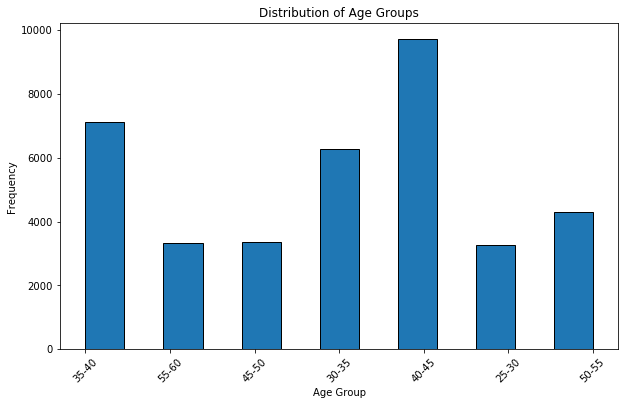

In [7]:
print(f"The range of age values is: {df['Age'].min()}-{df['Age'].max()}")
print(f"The mean of age values is: {df['Age'].mean()}")

# bins for age groups
bins = range(15, 81, 5)  
labels = [f"{i}-{i+5}" for i in bins[:-1]]

# Bin the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# histogram of the Age groups
plt.figure(figsize=(10, 6))
plt.hist(df['Age_Group'], bins=len(labels), edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

## 3.3 Occupation <a id="Occupation"></a>

There are 11 unique occupations in the original dataset. We can reduce the total number of occupations by combining similar fields. We can combine the "Salesperson" and "Sales Representative" entries into a single category. We can also combine the "Engineer" and "Software Engineer" entries into a single category.

In [12]:
# Merge "Sales Representative" into "Salesperson" and "Software Engineer" into "Engineer"
df['Occupation'] = df['Occupation'].replace({'Sales Representative': 'Salesperson', 'Software Engineer': 'Engineer'})
df1=df

Nurse, doctor and engineer are the top 3 occupations in these datasets, but managers and scientists are the least two occupations for this survey. We can guess that the scientists are the least representative in the society as not many scientific positions. But for managers as we know there are many occupations about managers in the job markets. And I believe the way these data are not widely covering all the occupation types and this may lead to biased results of this analysis report, but this report can also be a representative one per the sleep quality and the public health conditions.

Value counts:
Nurse          7324
Doctor         7225
Engineer       6661
Lawyer         4661
Teacher        4012
Accountant     3726
Salesperson    3286
Scientist       412
Manager          93
Name: Occupation, dtype: int64


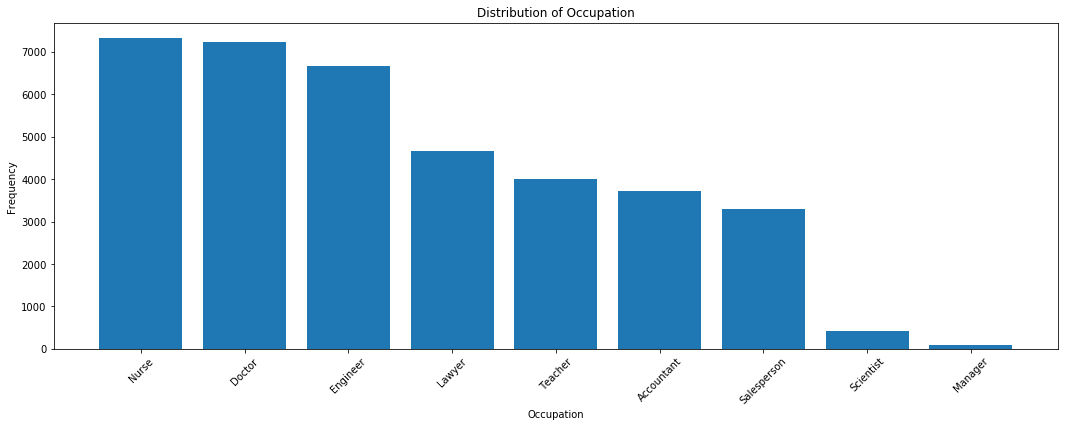

In [13]:
column = 'Occupation'
unique_counts = df[column].value_counts()

print("Value counts:")
print(unique_counts)

plt.figure(figsize=(18,6))
plt.bar(unique_counts.index, unique_counts.values)
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate labels as they are too long
plt.show()

## 3.4 Sleep Quality <a id="Sleep-Quality"></a>

Overall, the sleep quality is good, the majority has good ratings here. Although we do not have a specific definition of what range represents good sleep quality. However, we see the histogram is left skewed so we can see the majority is beyond the average sleep rating. The majority of sleep quality ratings are beyond 6. From the data we can see general speaking, the residents get good sleep quality within this survey scope.

The range of sleep quality values is: 4-9


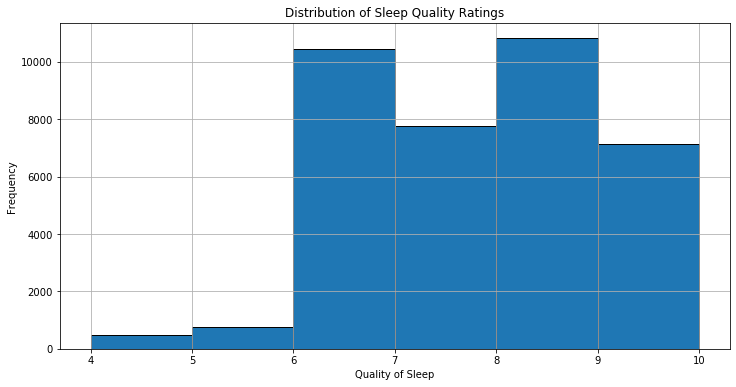

In [14]:
# Display range of sleep quality values
print(f"The range of sleep quality values is: {df['Quality of Sleep'].min()}-{df['Quality of Sleep'].max()}")

# Define bins in increments of 1 for sleep quality
bins = np.arange(df['Quality of Sleep'].min(), df['Quality of Sleep'].max() + 2, 1)

# Plot histogram directly on 'Sleep Quality' column
plt.figure(figsize=(12, 6))
plt.hist(df['Quality of Sleep'], bins=bins, edgecolor='black')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Quality Ratings')
plt.xticks(bins)  # Set x-ticks to align with bins
plt.grid()
plt.show()

# 4. Model Experiment <a id="Model-Experiment"></a>

As we can see above, this dataset contains a variety of health and lifestyle variables potentially relevant to sleep quality and disorders. Here’s a quick summary of the columns:

**Demographic & Professional Info**: Gender, Age, Occupation

**Sleep & Activity Info**: Sleep Duration, Quality of Sleep, Physical Activity Level, Daily Steps, Sleep Disorder

**Health Indicators**: Stress Level, BMI Category, Blood Pressure, Heart Rate

And I plan first do the data standardization, then explore the data using:

* K-Means clustering

* Hierarchical clustering

* Mini-Batch K-Means clustering

* K-NN after Mini-Batch K-Means clustering 

for further analysis.

# 5 Standardization <a id="Standardization"></a>

To identify groups with common characteristics and uncover associations affecting sleep, I will first do K-Means Clustering using numerical features. But before that, I'll first start by preprocessing the data: encoding categorical variables, handling Blood Pressure, and normalizing numerical fields. ​

In [24]:
from sklearn.preprocessing import LabelEncoder

df=df1

# Parse blood pressure
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Encode categorical columns
label_encoders = {}
for col in ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unused columns
df_features = df.drop(columns=['Person ID', 'Blood Pressure'])

# Ensure all columns are numeric
df_features = df_features.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN
df_features = df_features.dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Preparing for clustering
X_scaled_df = pd.DataFrame(X_scaled, columns=df_features.columns)
X_scaled_df.tail()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
37395,-1.004610,1.018650,-0.554757,1.719675,1.411657,-1.398098,-1.343006,-0.902901,-1.246844,-1.120969,-0.008817,-0.452675,-0.750258
37396,-1.004610,1.248662,-0.554757,1.719675,1.411657,-1.398098,-1.343006,-0.902901,-1.246844,-1.120969,-0.008817,-0.452675,-0.750258
37397,-1.004610,1.133656,-1.361786,-0.668622,-0.261458,-0.678098,0.912196,1.199135,0.446612,-0.502978,-1.564339,0.192776,0.061254
37398,0.995412,0.098598,-0.554757,-0.291523,-1.098015,-0.582098,0.912196,-0.202223,-0.279155,-0.008586,-0.008817,-1.485396,-1.399467
37399,0.995412,0.213604,1.059301,-1.045722,-1.098015,-0.678098,0.912196,1.199135,0.446612,-0.502978,-1.564339,0.192776,0.061254


Per above result, the data is now cleaned and normalized, which is ready for modeling. Here's what I have completed so far per above preprocessing steps: 

- Parsed Blood Pressure into Systolic_BP and Diastolic_BP

- Encoded categorical variables (Gender, Occupation, BMI Category, Sleep Disorder)

- Standardized all numeric features for clustering

# 6. K-Means Clustering <a id="K-Means-Clustering"></a>

Below is applying K-Means clustering for the above preprocessed data.

## 6.1 K-Means Kustering Processing <a id="K-Means-Kustering-Processing"></a>

In [35]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=123)

X_scaled_df['Cluster'] = kmeans.fit_predict(X_scaled_df)

# Add cluster labels to the original processed data for interpretation
df_features['Cluster'] = X_scaled_df['Cluster']

# cluster-wise mean to interpret characteristics
cluster_summary = df_features.groupby('Cluster').mean()

cluster_summary

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
Cluster,,,,,,,,,,,,,
0,0.614780,39.294982,4.664337,6.408050,6.220372,40.842457,6.501139,2.084034,71.906621,5544.537815,0.564989,129.866410,85.042959
1,0.598287,39.819502,1.901769,7.647358,7.990711,63.396596,4.576594,0.099733,68.222494,7171.631995,0.987429,123.278563,80.508733
2,0.030199,53.807445,4.879205,7.124518,7.568844,82.457766,5.416654,2.969801,72.008521,8268.709822,1.893557,139.969801,94.879205


Above is the updated K-Means cluster summary based on clean, standardized data. Here I set 3 clusters, and each cluster represents a distinct group of people with similar sleep and health patterns. From here I can compare: Stress and sleep quality, occupations and disorders, and BMI, and sleep duration.

From the above table, cluster 0 represents a moderately stressed with average sleep group. They have sleep duaration around 6.4 hours, sleep quality around 6.2, stress level is highest around 6.5, BMI category is around 2.08 approaching overweight indicating weight concerns. Their daily steps are lower around 5544 steps showing the reduced physical activity. The individuals in this group may be at risk due to poor sleep patterns and elevated stress. The interventions in sleep hygiene and stress management amy benefit this group.

Per the cluster 1, it represents the hiealthiest and most active population as active and balanced sleepers. They have sleep duration around 7.6 hours, sleep quality around 8.0, stress level is moderate around 4.6, BMI category is around 0.1 in a healthy range. This cluster 1 shows a healthy and active with optimal sleep duration and quality, moderate stress as well as low BMI. The people in this cluster take most daily steps around 7171 steps in the cluster. This cluster 1 people reflects balanced lifstyles and represents a healty-conscious people group, may serve as a reference baseline for healthy sleep and physical patterns.

The last cluster 2 represents the oldest group in the dataset, well-rested individuals with moderate risk. Their age is above 53.8. They have sleep duration around 7.1 hours, with good sleep quality around 7.6 hours, stress level around 5.42, BMI category is around 2.96 representing overweight range, and sleep disorder prevalence is around 1.89 meaning more frequent sleep disorders. This group as cluster 2 has the highest physical activity around 82.5, showing they have active despite their older age with average age 54 year-old. This cluster 2 says despite of good habits, age and weight could be increasing their disorder risks.

## 6.2 PCA & t-SNE Visualization <a id="PCA-and-t-SNE-Visualization"></a>

E:\Anaconda_new\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\Anaconda_new\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


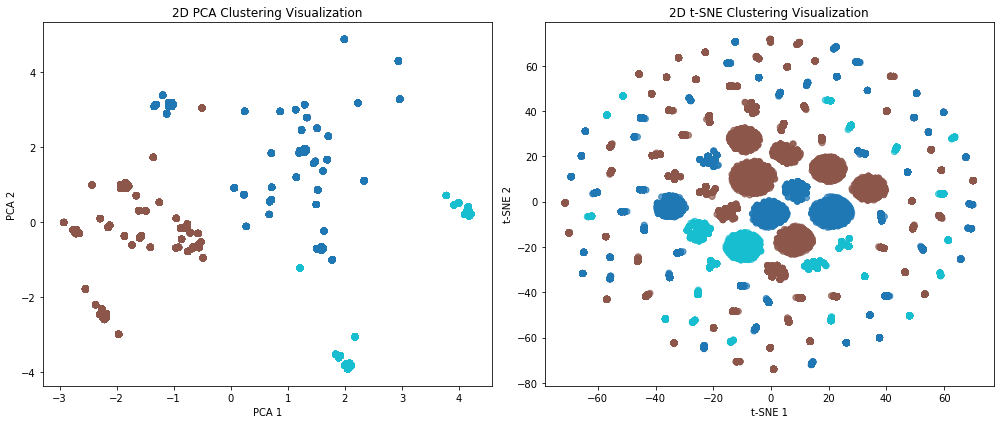

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_df.drop(columns='Cluster'))

# t-SNE
tsne = TSNE(n_components=2, random_state=123, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(X_scaled_df.drop(columns='Cluster'))

# Plot both
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
ax1.scatter(pca_result[:, 0], pca_result[:, 1], c=X_scaled_df['Cluster'], cmap='tab10', alpha=0.7)
ax1.set_title('2D PCA Clustering Visualization')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')

# t-SNE Plot
ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], c=X_scaled_df['Cluster'], cmap='tab10', alpha=0.7)
ax2.set_title('2D t-SNE Clustering Visualization')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

Per the above, I plot both PCA and t-SNE for the 3 K-Means clusters identified in the dataset. In both figures, the clusters are clearly separated in both plots, so we can see it captures distinck population groups. I do not see any overlap in either of plots, so the dataset is well-defined. The combination of both plots supports the validity of K-Means with 3 clusters.

# 7 Hierarchical Clustering <a id="Hierarchical-Clustering"></a>

The below is I used hierarchical clustering for analysis.

## 7.1 Hierarchical Clustering Processing <a id="Hierarchical-Clustering-Processing"></a>

In [15]:
# pip install mlxtend

In [48]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df=df1

# Bin numerical values into categories
df['Stress Level Bin'] = pd.cut(df['Stress Level'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])
df['Sleep Duration Bin'] = pd.cut(df['Sleep Duration'], bins=[0, 6, 8, 12], labels=['Short', 'Normal', 'Long'])
df['Activity Bin'] = pd.cut(df['Physical Activity Level'], bins=[0, 40, 70, 100], labels=['Low', 'Moderate', 'High'])

# Select relevant columns for association rules
df_rules = df[['Occupation', 'BMI Category', 'Sleep Disorder',
               'Stress Level Bin', 'Sleep Duration Bin', 'Activity Bin']]

# Convert rows to transactions
transactions = df_rules.apply(lambda row: row.astype(str).tolist(), axis=1).tolist()

# Encode transactions into boolean format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Run Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate rules with confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Filter for rules that lead to sleep disorders
sleep_disorder_rules = rules[rules['consequents'].astype(str).str.contains('Sleep Disorder')]

# Sort by confidence
top_rules = sleep_disorder_rules.sort_values(by='confidence', ascending=False)

# Print the top 10 rules
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [49]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print(frequent_itemsets[frequent_itemsets['itemsets'].astype(str).str.contains('Sleep Disorder')])
print(df['Sleep Disorder'].value_counts())

Empty DataFrame
Columns: [support, itemsets]
Index: []
1    21942
2     7835
0     7623
Name: Sleep Disorder, dtype: int64


In [54]:
from sklearn.cluster import AgglomerativeClustering

# Efficient hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

# Add cluster labels
df_features['Cluster'] = labels

# Get cluster-wise summary
cluster_summary = df_features.groupby('Cluster').mean()

# Print summary
print(cluster_summary)

           Gender        Age  Occupation  Sleep Duration  Quality of Sleep  \
Cluster                                                                      
0        0.000000  51.118758    5.887429        6.946939          7.369192   
1        0.598800  39.944503    1.922171        7.655208          7.998945   
2        0.786002  37.909983    3.669579        6.374517          6.048395   

         Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
Cluster                                                                    
0                      71.009010      5.092271      3.000000   69.628528   
1                      63.338370      4.559413      0.131937   68.198822   
2                      40.940611      7.097772      1.784922   74.083734   

         Daily Steps  Sleep Disorder  Systolic_BP  Diastolic_BP  
Cluster                                                          
0        7697.785497        1.352584   138.520951     93.520951  
1        7132.137103        0.

In [55]:
cluster_summary

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
Cluster,,,,,,,,,,,,,
0,0.000000,51.118758,5.887429,6.946939,7.369192,71.009010,5.092271,3.000000,69.628528,7697.785497,1.352584,138.520951,93.520951
1,0.598800,39.944503,1.922171,7.655208,7.998945,63.338370,4.559413,0.131937,68.198822,7132.137103,0.987445,123.280762,80.529637
2,0.786002,37.909983,3.669579,6.374517,6.048395,40.940611,7.097772,1.784922,74.083734,5452.243055,0.724158,128.685285,83.808383


From the above 3 clusters by Hierarchical clustering method. The cluster 0 represents a groupd with phycically active but high-risk individuals due to elevated BMI and blood pressure, combined with poor sleep health which showing moderate duration but high disorder index. It represents moderate age, high activity, high BMI & BP with poor sleep quality. The average age is 51.1 year-old represents older group. The sleep duration is around 6.95 hrs showing moderate sleep time. The quality of sleep is 7.37 represents moderate quality. The physical activity is 71 which is relatively active group. The stress level is 5.1 falling in mid-range stress. The BMI category is 3.0 showing overweight and obese classification. The daily steps is around 7698 which is reasonably high. The heart rate is 69.6 moderate condition. But systoli/Diastolic BP is 138.5/93.5 showing high blood pressure range. So, despite being active, their cardiovascular and sleep metrics suggests monitoring is needed.

Per cluster 1, it represents a young, healthy, best sleepers, low BMI and disorder group. It has average age 39.9 which is the youngest group. The sleep duration is 7.66 hrs which has the longest sleep. The quality of sleep is 8 having the highest quality. The physical activity is 63.3 shows active, the stress level is 4.56 lower stress. BMI category is 0.13 very fit and healthy weight. The daily steps is around 7132 steps showing active. The heart rate is 68.2 says normal resting rate. The sleep disorder is around 0.99 means low. And systolic/diastolic BP is 123.3/80.5 means ideal BP range. This cluster 1 clearly repfresents the healthiest population in the dataset. They are young, sleep well with low stress, healthy BMI and good blood pressure. They also reflect an ideal benchmark group for health and wellness interventions.

The last cluster 2, shows the youngest but high stress with poor sleep quality and inactive group. This is also an at-risk group. Their sleep duration is 6.37 hrs having the lowest sleep duration. The quality of sleep is 6.05 is still the lowest sleep quality. The physical activity is around 40.9 showing least active. And their daily steps is around 5452 with lowest steps. This suggests the cluster 2 group's lifestyle suggest risk of develping chronic conditions if continue in this pattern and lifestyle.

So, the cluster 0 is physically active but hypertensive and overweight. The cluster 1 is health-optimal in fit, well-rested condition and low stress. The cluster 2 group is sleeep-deprived, stressed and inactive, this cluster needs targeted intervention.

## 7.2 UMAP <a id="UMAP"></a>

E:\Anaconda_new\lib\site-packages\umap\umap_.py:1953: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism."


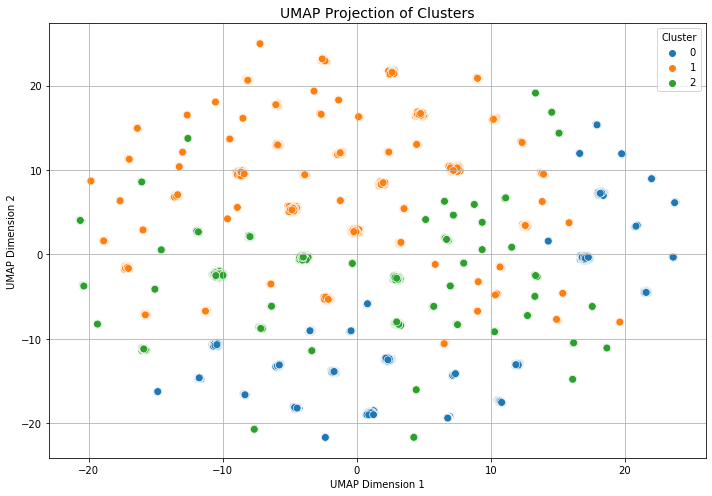

In [110]:
# UMAP projection
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Plot UMAP clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette="tab10", s=60)
plt.title("UMAP Projection of Clusters", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

From above plot, I plot UMAP projection of clusters. Cluster 0 (blue) is densely packed on the right of the plot with moderate vertical spread. This shows come compact grouping indicating that these group individuals are homogeneous in the feaure space. This corresponds to the group with good sleep habits and low BMI. The cluster 0 is well-separated, possibly the healthiest cohort in the plot.

The cluster 1 (orange) is mostly widespread cluster across both axes, which appears to cover a central band in the plot, just slightly concentrated toward the upper middle region. And this wide spread may suggest more variability among individuals in this group. This aligns with a moderate health population. This cluster 1 is more psread with variability, showing a transitional health group.

The cluster 2 (green) is clustered toward the left, which is also slightly lower on the vertical axis. This group has a moderate density with some subgroups forming, indicating the latent structure and sub-clustering within the population. This is the at-risk group as described in previous clustering summary, representing individuals with high stress, poor sleep and low activity. 

## 7.3 Violin Plot <a id="Violin-Plot"></a>

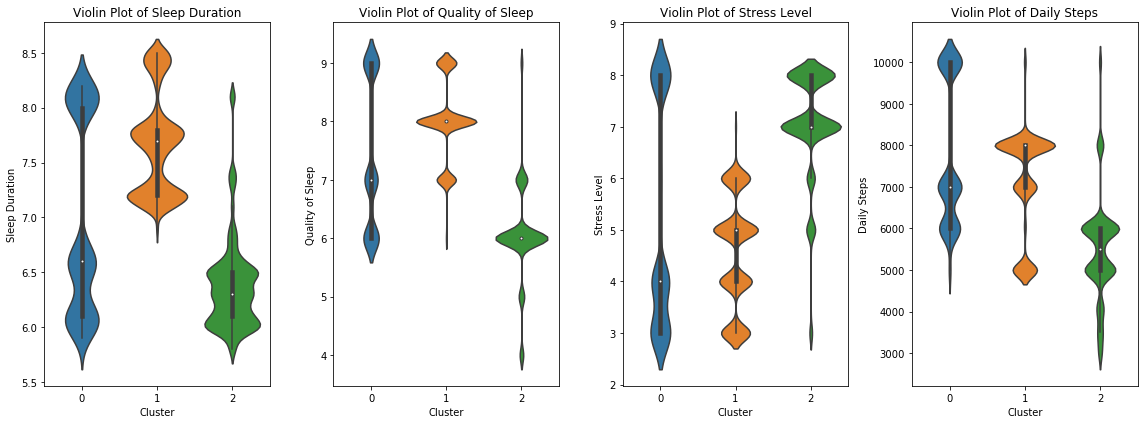

In [62]:
# Plot violin plot
selected_features = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Daily Steps']
num_plots = len(selected_features)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(4 * num_plots, 6))

for i, feature in enumerate(selected_features):
    sns.violinplot(ax=axes[i], data=df_features, x='Cluster', y=feature, palette='tab10')
    axes[i].set_title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

Above is I plot the voilin plots for each cluster across variables: sleep duration, quality of sleep, stress level and daily steps. We can see:

Per sleep duration in the first sub-plot, the cluster 0 (blue) median sleep is around 6.7 hrs, The distribution is moderately spread with a slight right skew, showing the shorter sleep for this group. The cluster 1 median sleep duration is high about 7.5 hrs. This group of people also shows a tight and consistent sleep duration with a more regular and healthier sleep. The cluster 2 has the lowest overall sleep duration but with a wide spread. The median sleep around 6.3 hours with some extreme short time sleepers. So we can see the cluster 1 is the best sleep, cluster 0 is average, and cluster 2 have some problematic sleep duration.

Per quality of sleep, cluster 0 median is mid-to-high around 7.2, cluster 1 has the best sleep quality around 8.2, this shows the excellent and consistent sleep quality in this group. The cluster 2 has low sleep quality around 5.5 and majority of individuals here have poor sleep quality. This shows cluster 1 sleep quality is best, cluster 2 has sleep quality concern, and cluster 0 is in between.

Per the stress level, the cluster 0 bimodal pattern with two subgroups is very obvious: one is at low stress around 4, nother is at very high stress around 8. This indicates cluster 0 have divergent emotional health within the cluster. The cluster 1 majority are in the moderate stress range between 4.5 to 5.5. And this suggests a relatively low variation with emotional stability. Cluster 2 has the highest stress: strong peak is around 8. So it shows: the cluster 0 has systematically high stress, cluster 1 is emotionally stable and cluster 0 is in between.

Lastly, per the daily steps the cluster 0 with bimodal spread: one subgroup walking around 7000 steps per day, while another around 10000 steps daily. This shows some individuals are highly active, while others are moderate. The cluster 1 is around 7.7 thousand steps daily which is consistent. Cluster 2 is the least active cluster around 5000 steps averagely, which shows this cluster is sedentary.

In all, we can see cluster 0 (blue)  is diverse group, some are healthy but some are in high-stress. The cluster 1 (orange) is the healthiest group among these three. And cluster 2 (green) is at-risk group with poor sleep, high stress and low activity.

# 8 Mini-Batch K-Means Clustering <a id="Mini-Batc-K-Means-Clustering"></a>

Below I continue to test the Mini-Batch K-Means clustering model, to see if it can offer us some interesting insights.

## 8.1 Mini-Batch K-Means Clustering Processing <a id="Mini-Batch-K-Means-Clustering-Processing"></a>

E:\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
E:\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
E:\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment va

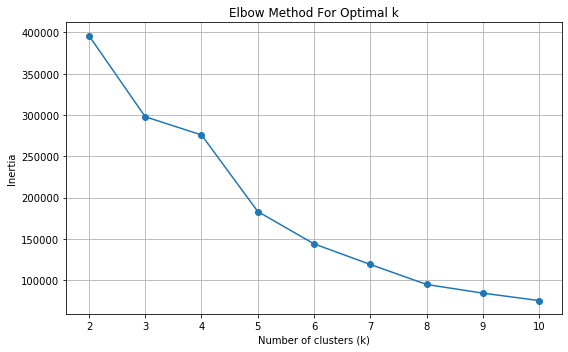

In [66]:
from sklearn.cluster import MiniBatchKMeans

# Use the elbow method to find an appropriate number of clusters
inertia = []
k_range = range(2, 11)
for k in k_range:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42)
    mbk.fit(X_scaled)
    inertia.append(mbk.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

First get the elbow plot that helps us determine the optimal number of clusters for the Mini-Batch K-Means model. From the plot, we can see the steep drop happens between k=2 and k=5 indicating the big improvements. However, after k=5, the reduction in inertia slows considerably. Therefore, k=3, 4 or 5 seems to be the optimal number of clusters. So I still proceed with clustering using k=3, which is better comparison with two clustering methods mentioned above.

In [79]:
# Fit the Mini-Batch KMeans model with k=3
k = 3
mbk = MiniBatchKMeans(n_clusters=k, random_state=123)
df_features["Cluster"] = mbk.fit_predict(X_scaled_df)

# Add cluster labels back to the original dataframe for interpretation
df_clustered = df1
df_clustered["Cluster"] = df_features["Cluster"]

# cluster-wise means for numeric and encoded categorical data
cluster_summary = df_clustered.groupby("Cluster").mean(numeric_only=True)

# Count occupations and sleep disorders in each cluster for categorical insight
occupation_counts = df_clustered.groupby("Cluster")["Occupation"].value_counts().unstack(fill_value=0)
disorder_counts = df_clustered.groupby("Cluster")["Sleep Disorder"].value_counts().unstack(fill_value=0)

cluster_summary, occupation_counts, disorder_counts

E:\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


(            Person ID    Gender        Age  Occupation  Sleep Duration  \
 Cluster                                                                  
 0        18719.745700  0.448234  43.012082    2.989806        7.610479   
 1        18722.276155  0.781120  37.804358    3.759715        6.360390   
 2        18485.952993  0.000000  49.747728    5.000000        6.064431   
 
          Quality of Sleep  Physical Activity Level  Stress Level  \
 Cluster                                                            
 0                8.052102                63.287818      4.263948   
 1                6.016488                40.064218      7.146563   
 2                6.000000                90.000000      8.000000   
 
          BMI Category  Heart Rate   Daily Steps  Sleep Disorder  Systolic_BP  \
 Cluster                                                                        
 0            0.825740   67.999413   6952.655424        1.026554   126.991191   
 1            1.825957   73.61498

In [80]:
cluster_summary

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
Cluster,,,,,,,,,,,,,,
0,18719.745700,0.448234,43.012082,2.989806,7.610479,8.052102,63.287818,4.263948,0.825740,67.999413,6952.655424,1.026554,126.991191,83.639148
1,18722.276155,0.781120,37.804358,3.759715,6.360390,6.016488,40.064218,7.146563,1.825957,73.614984,5514.627326,0.691062,128.453669,83.690097
2,18485.952993,0.000000,49.747728,5.000000,6.064431,6.000000,90.000000,8.000000,3.000000,75.000000,10000.000000,1.872140,140.000000,95.000000


In [82]:
# cluster-wise means for numeric and encoded categorical data, excluding Person ID
cluster_summary_filtered = df_clustered.drop(columns=["Person ID"]).groupby("Cluster").mean(numeric_only=True)

# filtered summary
cluster_summary_filtered

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
Cluster,,,,,,,,,,,,,
0,0.448234,43.012082,2.989806,7.610479,8.052102,63.287818,4.263948,0.825740,67.999413,6952.655424,1.026554,126.991191,83.639148
1,0.781120,37.804358,3.759715,6.360390,6.016488,40.064218,7.146563,1.825957,73.614984,5514.627326,0.691062,128.453669,83.690097
2,0.000000,49.747728,5.000000,6.064431,6.000000,90.000000,8.000000,3.000000,75.000000,10000.000000,1.872140,140.000000,95.000000


Now let’s focus on age, sleep duration, quality of sleep, physical activity level, stress level, heart rate and daily steps for analysis. Above is the returned summary information for the k=3 Mini-Batch K-Means clustering.

## 8.2 Radar Profile Plot <a id="Radar-Profile-Plot"></a>

E:\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


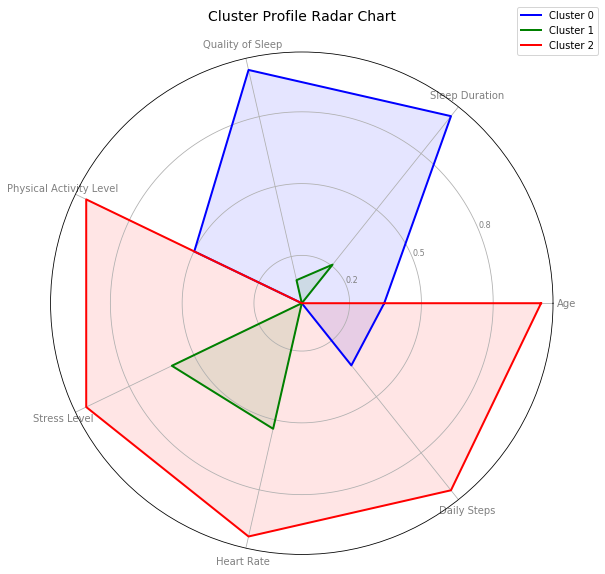

In [95]:
df = df2
df_clean = df.drop(columns=["Person ID", "Blood Pressure"])
label_encoders = {}
for col in df_clean.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
k = 3
mbk = MiniBatchKMeans(n_clusters=k, random_state=123)
df_clean["Cluster"] = mbk.fit_predict(X_scaled)
df_clustered = df.copy()
df_clustered["Cluster"] = df_clean["Cluster"]

cluster_profiles = df_clustered.drop(columns=["Person ID", "Gender","Occupation","Blood Pressure","BMI Category","Sleep Disorder"]).groupby("Cluster").mean()

# Normalize data for radar chart cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Create radar chart
features = cluster_profiles_norm.columns.tolist()
num_vars = len(features)

# Set up angles for each axis
angles = [n / float(num_vars) * 2 * 3.14159 for n in range(num_vars)]
angles += angles[:1]  # repeat the first angle to close the circle

# Set up the figure
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'm']
for i in range(k):
    values = cluster_profiles_norm.iloc[i].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {i}", color=colors[i], linewidth=2)
    plt.fill(angles, values, alpha=0.1, color=colors[i])

plt.xticks(angles[:-1], features, color='grey', size=10)
plt.yticks([0.2, 0.5, 0.8], ["0.2", "0.5", "0.8"], color="grey", size=8)
plt.title("Cluster Profile Radar Chart", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

From above plot, cluster 0 have very high in sleep duration and quality of sleep. They are moderate in physical activity and daily steps. However, they are low in age, stress level and heart rate. This cluster 0 represents young and well-rested sleepers with good sleeping habits. They are reasonably active and show of low cardiovascular and stress risk. This is a potentially healthies group among the three.

The cluster 1 regresents stressed and inactive group: they have moderate in stress level and heart rate, but low in the age representing younger people, short sleep duration, low quality of sleep, low physical activity and few daily steps. This cluster 1 represents young but sleep-deprived and inactive individuals. Their stress and heart rate are higher than average with poor sleep quality and duration, making them at risk for future metabolic and stress-related health issues.

The last cluster 2 represents the older but active and stressed group of people. They have high values in age, physical activity level, daily steps, stress level and heart rate, but low in sleep duration and quality of sleep. This cluster 2 is composed of older people who are highly physically active but also exhibit high stress and high heart rate. Their sleep is both short and in low quality. They may be overcompensating with activity, but their stress load and aging may increase health risks if unmanaged by themselves.

## 8.3 Occupation Analysis <a id="Occupation-Analysis"></a>

Next, I am quite interested in how occupations impact people’s sleep quality.

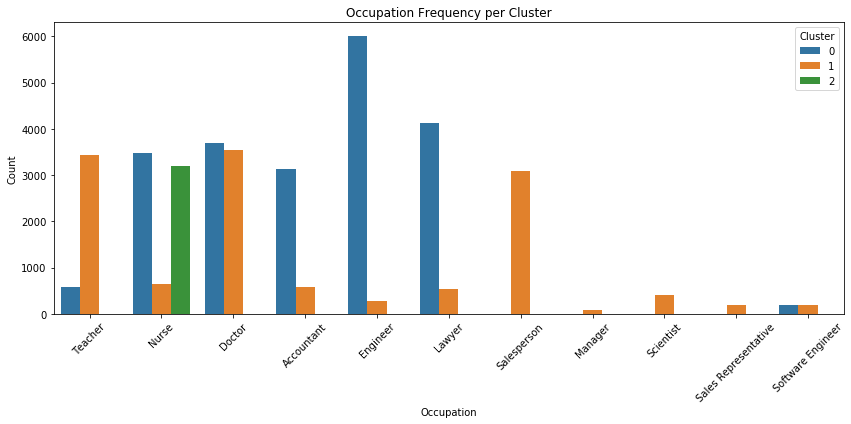

In [101]:
df["Cluster"] = df_clean["Cluster"]

# Occupation frequency by cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Occupation", hue="Cluster")
plt.title("Occupation Frequency per Cluster")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Per the Occupation frequency per cluster bar plot above. The chart illustrates how different occupations are distributed across the three identified clusters. Obviously the most frequent occupations across the datasets are engineer, teacher, doctor, nurse, lawyer and accountant. And the distribution of occupations across clusters show clear clustering patterns that suggest a relationship between profession and helath and sleep patterns.

Per cluster 0, it is dominated by engineers and lawyers. Engineer has the highest count in this cluster 0 around 6000. Lawyer, doctor, accountant, and teacher also show notable numbers. Software engineer and sales representative show in small numbers. This cluster is likely representing structured, possibly sedentary positions with moderate or good health profiles aligns with the well-rested, younger and stable in the radar chart analysis. This cluster contains technical and analytical occupations with a dominant in engineers, showing a population with relatively good sleep duration and low stress.

Per cluster 1, it represents high occupation diversity with many teachers and salesperson. Teachers and doctors are prominent in this cluster 1. Notably, salesperson is almost entirely concentrated in this cluster around 3000 counts which is unique. Other occupations like nurse, accountant and scientist also appear in this cluster 1. This cluster corresponds to the most varied group including healthcare, education, and sales professionals. This cluster 1 represents individiauls with variable oriented roles. Salesman and teachers may experience moderate sleep, moderate stress and variable activity, which aligns with previous moderate health group from both rada and violin plots.

Per the last one cluster 2, it almost exclusively consists of nurses around 3200 head-count. It has minimal presence of other occupations. This is a strong signal that this cluster uniquely captures the nursing population. This cluster 2 also highly distinct and likely represents a group with high stress, poor sleep, and irregular activity patterns, which fits a typical nurse schedule: night shifts, long hours and emotional strain.

## 8.4 Sleep Disorder Analysis <a id="Sleep-Disorder-Analysis"></a>

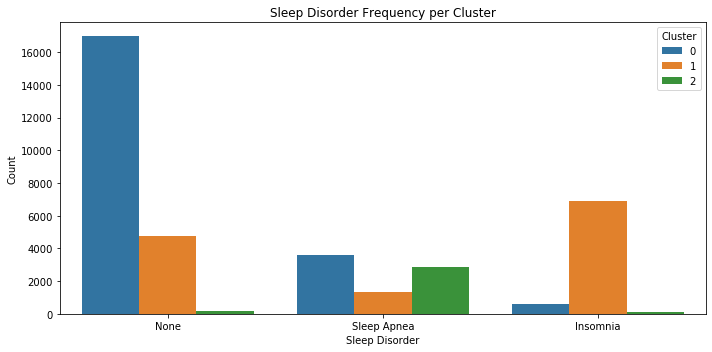

In [102]:
# Sleep disorder frequency by cluster
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Sleep Disorder", hue="Cluster")
plt.title("Sleep Disorder Frequency per Cluster")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Per the above slep disorder frequency per cluster bar plot. We can see cluster 0 represents mostly healthy sleepers. The majority (around 17000) of individuals in this cluster 0 have no sleep disorder. A smaller portion around 3500 have sleep apnea. And only a tiny number around 1000 report insomnia. This cluster 0 is clearly the healthiest in terms of sleep. It is dominated by individuals who report no sleep disorder, which alighs with earlier radar and violin plot findings where cluster 0 with the highest sleep quality and duration. This cluster 0 also likely includes well-rested, low-stress, and generally healthier individuals. 

The cluster 1 is the insomnia-dominant group. It is most porminet for insomnia around 7000 individuals, which is more than any other cluster. Around 5000 individuals report no disorder, and about 1500 hae sleep apnea. This cluster 1 is likely representing people with moderate stress and variable health habits, who may work irregular hours or with sleep disturbances such as sales or teaching professions. This also aligns with earlier violin plot results showing the moderate sleep duration but mixed quality.

The last cluster 2 has high sleep apnea incidence. This cluster has a relatively balanced distribution: around 3000 with sleep apnea, 500 with no disorder and 300 with insomnia. Notably, the number of individuals without a disorder is very low in this cluster. This cluster 2 appears to be the sleep disorder-heavy cluster especially for sleep apnea. This aligns with earlier radar chart observations with poor sleep quality, high stress and low physical activity. Also, the fact that nurses dominate this cluster from the occupation chart, who ofter face long shifts, night work and sleep fragmentation.

# 9 K-NN After Mini-Batch K-Means Clustering <a id="K-NN-After-Mini-Batch-K-Means-Clustering"></a>

The k-nearest neighbors (K-NN) algorithm is a supervised classification algorithm, but it can combine with clustering results in powerful ways for the density estimation.

## 9.1 Confusion Matrix <a id="Confusion-Matrix"></a>

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Mini-Batch KMeans clustering
k = 3
kmeans = MiniBatchKMeans(n_clusters=k, random_state=123)
cluster_labels = kmeans.fit_predict(X_scaled)

# Use cluster labels as "pseudo-classes" for K-NN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_labels, test_size=0.2, random_state=123)

# Train K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=False)

print(report)

E:\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4305
           1       1.00      1.00      1.00      2554
           2       1.00      1.00      1.00       621

    accuracy                           1.00      7480
   macro avg       1.00      1.00      1.00      7480
weighted avg       1.00      1.00      1.00      7480



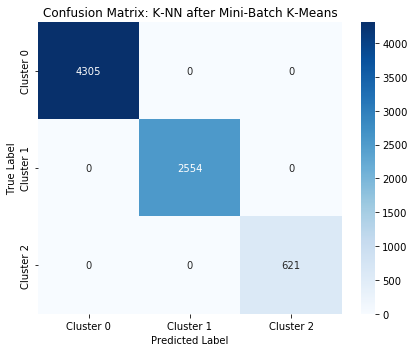

In [116]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(k)],
            yticklabels=[f'Cluster {i}' for i in range(k)])
plt.title("Confusion Matrix: K-NN after Mini-Batch K-Means")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

Above confusion matrix is used to evaluate how well a K-NN classifier is able to predict cluster labels learnt from Mini-Batch K-Means clustering. The rows represent the actual cluster labels from Mini-Batch K-Means. The columns are the predicted cluster labels from K-NN. Each cell (i,j) represents the number of samples from the actual cluster i predicted as cluster j.

From the observation, we can see all data points are classified correctly by K-NN with every prediction is aligned with the clustering labels. The no non-zero off-diagonal values represent no miscalssifications. The diagonal dominance also shows the matrix is perfectly diagonal, meaning the learnt cluster structure is easily recoverable by K-NN. This also suggests these 3 clusters are well-separated in feature space.

And from the matrix, we see cluster 0 is the largest with 4305 count, followed by cluster 1 with 2554 and cluster 2 with 621. This shows the K-Means model grouped more data into cluster 0, the dominant sleep and health pattern group.

By this confusion matrix, we can also conclude the Mini-Batch K-Means clustering generated distinct and compact clusters. This also implies the feature of this clustering is well-normalized and relevant, clusters naturally separable with minimal overlap, and the Mini-Batch K-Means model retrieved a strong structure in the original dataset.

## 9.2 Mini-Batch K-Means t-SNE <a id="Mini-Batch-K-Means-t-SNE"></a>

E:\Anaconda_new\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\Anaconda_new\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


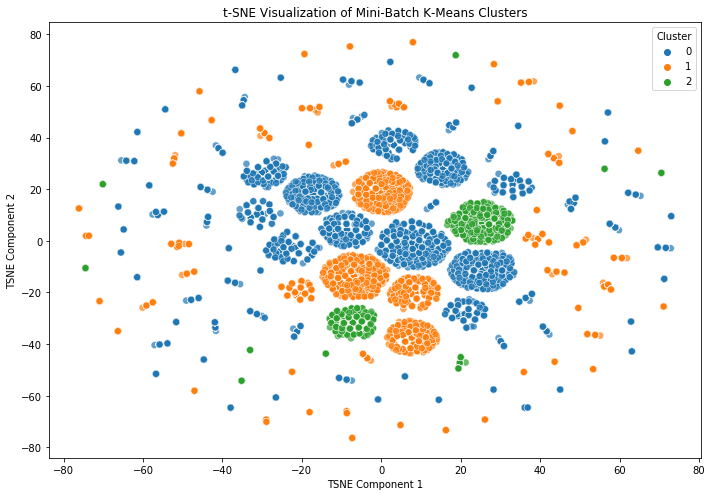

In [117]:
# t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=123, perplexity=50, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Create DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["Cluster"] = cluster_labels

# Plot t-SNE clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Cluster", palette="tab10", s=50, alpha=0.7)
plt.title("t-SNE Visualization of Mini-Batch K-Means Clusters")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend(title="Cluster", loc="best")
plt.tight_layout()
plt.show()

Then I plot a t-SNE figure showing a 2D projection of high-dimensional data that was clustered using Mini-Batch K-Means into 3 clusters as above. The plot shows well-defined and dense clusters with minimal overlap. The central region is densely packed with clear cluster boundaries, showing Mini-Batch K-Means successfully grouped data with distinct internal structure. This also identified this Mini-Batch K-Means algorithm successfully identified distinct subgroups in the population with the meaningful internal cohesion. The clusters are not only separated but also show the tightness, meaning individuals within each group share strong similarities. The points scattered outside the main cluster represent outliers.

This t-SNE visualization plot confirms the effectiveness of the Mini-Batch K-Means clustering on the sleep health datasets. The clusters are clearly defined, showing variables are rich enough to distinguish populations. 

# 10. Conclusion <a id="Conclusion"></a>

From the steps above, I have the data exploration, and model experiment using the K-Means clustering, Hierarchical clustering, Mini-Batch K-Means clustering and K-NN after Mini-Batch K-Means clustering, with a goal to find groups with the datasets with common characteristics and get some preliminary results and analysis per these clustering methods. 

Through generated tables and visualizations such as PCA plot, t-SNE plot, UMAP, Violin plot, radar profile plot we analyze the different sleep quality related to populations' demongraphic and professional information in different clusters based on variety of clustering methods.

Occupation analysis and sleep disorder analysis offer us some more information to address the concern of what kind of professions are easily get sleep disorder, and how sleep disorder situation in different clusters are also analyzed.

Actually, this research and project can be a good start or valuable reference for the professions in health care industry, and can be further expanded to derive more insights about people's BMI related to their sleep quality. Some other clustering methods such as Spectral clustering or density clustering with optics can also be applied for analysis. Combined with some other data about people's life style, exercise data, or live habit may get more information to provide more suggestions for population in different clusters to achieve better sleep quality and healthier life.